
# 🎯 Demonstrating Overfitting in Neural Networks with TensorFlow

In this notebook, we intentionally create a scenario that leads to **overfitting**. Overfitting occurs when a model learns the training data too well, including noise and details that don't generalize to unseen data.

---

## ✅ Key Characteristics of Overfitting
- Complex model architecture
- Small training dataset
- Lack of regularization
- Training for too many epochs

---


In [61]:

import tensorflow as tf
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
import numpy as np
import random


## 📥 Load and Preprocess MNIST Dataset

In [62]:

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize
x_train = x_train / 255.0
x_test = x_test / 255.0

# Split validation set
x_val = x_train[-10000:]
y_val = y_train[-10000:]
x_train = x_train[:-10000]
y_train = y_train[:-10000]

# Flatten images
x_train = x_train.reshape((-1, 28 * 28))
x_val = x_val.reshape((-1, 28 * 28))
x_test = x_test.reshape((-1, 28 * 28))


## 🔍 Reduce Dataset to Simulate Overfitting

In [63]:

# Take only 1000 training samples
x_small_train = x_train[:300]
y_small_train = y_train[:300]


[0 1 2 3 4 5 6 7 8 9] [34 39 28 34 32 23 29 29 21 31]


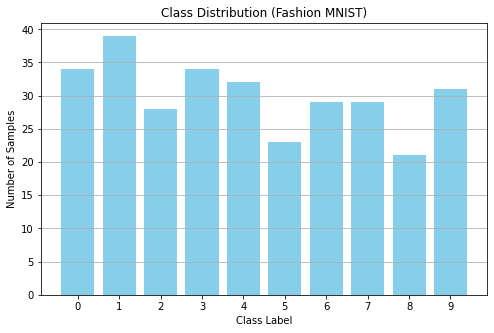

In [ ]:
# Plot the bar chart
classes, counts = np.unique(y_small_train, return_counts=True)
print(classes, counts)
plt.figure(figsize=(8, 5))
plt.bar(classes, counts, tick_label=[str(c) for c in classes], color='skyblue')
plt.title("Class Distribution (MNIST)")
plt.xlabel("Class Label")
plt.ylabel("Number of Samples")
plt.grid(axis='y')
plt.show()

## 🧠 Define a Complex Model Architecture

In [65]:

def overfitting_model():
    model = models.Sequential()
    model.add(layers.Input(shape=(784,)))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.Dense(128, activation='relu'))
    model.add(layers.Dense(10, activation='softmax'))

    model.compile(optimizer='adam',
                  loss='sparse_categorical_crossentropy',
                  metrics=['accuracy'])
    return model


## 🚂 Train the Model (Expect Overfitting)

In [66]:

model = overfitting_model()
history = model.fit(
    x_small_train, y_small_train,
    epochs=50,
    batch_size=32,
    validation_data=(x_val, y_val),
    verbose=2
)


Epoch 1/50
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing t

## 📊 Plot Training vs Validation Performance

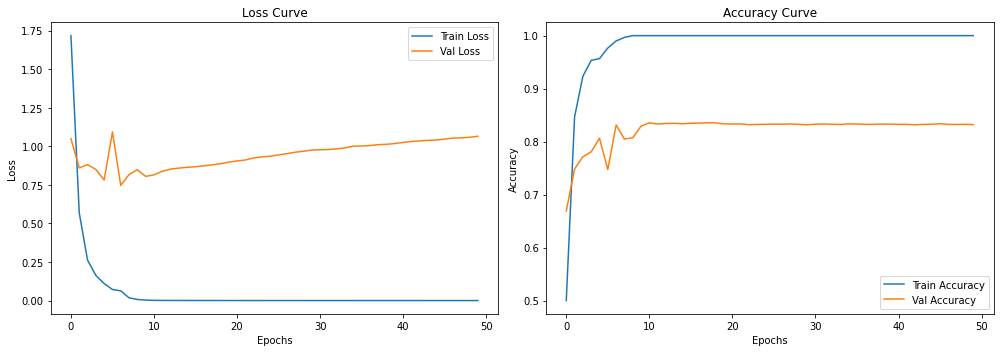

In [67]:

def plot_history(history):
    plt.figure(figsize=(14, 5))
    
    # Loss Plot
    plt.subplot(1, 2, 1)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Val Loss')
    plt.title('Loss Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()

    # Accuracy Plot
    plt.subplot(1, 2, 2)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Val Accuracy')
    plt.title('Accuracy Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_history(history)



---
## 🧠 Observations

- **Training Accuracy**: Near perfect (close to 100%)
- **Validation Accuracy**: Peaks and then drops or stagnates
- **Validation Loss**: Increases after initial epochs

This is a classic sign of **overfitting** — the model memorizes the small training data but performs poorly on unseen validation data.

---


In [68]:
# Evaluate
loss, acc = model.evaluate(x_test, y_test, verbose=1)
print(y_test[0:10])
# Show results
print(f"Accuracy: {acc:.4f}, Loss: {loss:.4f}")

# Predict on test set
y_pred = model.predict(x_test)

# Convert predictions to class labels
y_pred = np.argmax(y_pred, axis=1)
print(y_pred[0:10])


print("Accuracy Report:\n", classification_report(y_test, y_pred))

313/313 [==============================] - 1s 3ms/step - loss: 1.0978 - accuracy: 0.8267
[7 2 1 0 4 1 4 9 5 9]
Accuracy: 0.8267, Loss: 1.0978
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
[7 2 1 0 4 1 4 9 6 9]
Accuracy Report:
               precision    recall  f1-score   support

           0       0.86      0.95      0.90       980
           1       0.92      0.95      0.93      1135
           2       0.80      0.83

Predicted label: 0.2


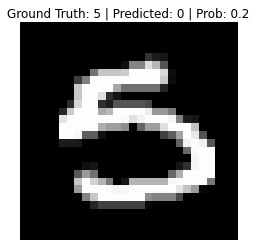

In [85]:

# Pick a random test sample
index = random.randint(0, x_test.shape[0] - 1)
sample_image = x_test[index].reshape(1, 784)  # Flatten for model input
ground_truth = y_test[index]

# Predict the label
logits = model.predict(sample_image)
# print(logits)
predicted_label = np.argmax(logits)

probabilities = str(tf.nn.softmax(logits).numpy()[0][predicted_label])[0:3]
# Print the probabilities
print(f"Predicted label: {probabilities}")
# Reshape back to 28x28 for visualization
plt.imshow(sample_image.reshape(28, 28), cmap='gray')
plt.title(f"Ground Truth: {ground_truth} | Predicted: {predicted_label} | Prob: {probabilities}")
plt.axis('off')
plt.show()